# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, gridspec, widgets
import logging, sys

log = logging.getLogger('plot_animation')
logging.basicConfig()

In [2]:
%matplotlib notebook

In [3]:

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
source1 = np.random.normal(-2.5, 1, 10000)
source2 = np.random.gamma(2, 1.5, 10000)
source3 = np.random.exponential(2, 10000)+7
source4 = np.random.uniform(14,20, 10000)

# plt.show()

<IPython.core.display.Javascript object>


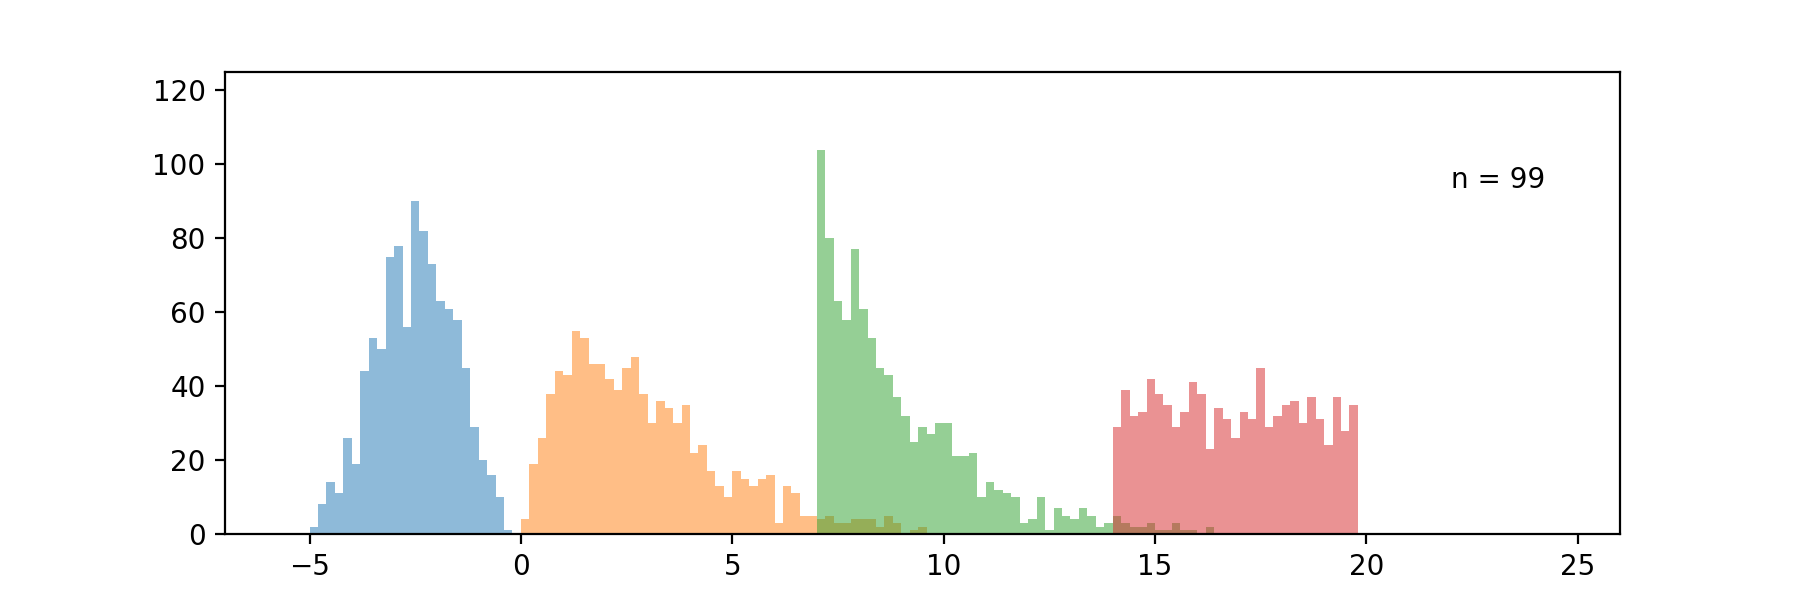

In [5]:

# create the function that will do the plotting, where curr is the current frame
# plt.cla()
def update(curr, total, perstep, x1, x2, x3, x4):
    # check if animation is at the last frame, and if so, stop the animation a
    plt.cla()
    end = curr * perstep
    plt.hist(x1[0:end], density=False, bins=np.arange(-5,0,0.2), alpha=0.5)
    plt.hist(x2[0:end], density=False, bins=np.arange(0,12,0.2), alpha=0.5)
    plt.hist(x3[0:end], density=False, bins=np.arange(7,17,0.2), alpha=0.5)
    plt.hist(x4[0:end], density=False, bins=np.arange(14,20,0.2), alpha=0.5);
    
    h = total/8
    plt.axis([-7,26,0,h])
#     plt.show()

#     plt.gca().set_title('Sampling the Normal Distribution')
#     plt.gca().set_ylabel('Frequency')
#     plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [22, h*3./4.])
    
def run_animation(steps, perstep):
    
    # plot the histograms
    total = steps*perstep
    fig = plt.figure(figsize=(9,3))
    
    log.debug('run with steps: %d', steps)
    x1, x2, x3, x4 = [np.sort(l[0:total]) for l in (source1, source2, source3, source4)]
    log.debug('x1: %s', x1)
    return (animation.FuncAnimation(fig, lambda c: update(c, total, perstep, x1, x2, x3, x4), steps, interval=50,
                                    repeat=False),
            x1, x2, x3, x4, fig)

# lambda c: update(c, steps)    
log.setLevel(logging.INFO)
a, x1, x2, x3, x4, fig = run_animation(100, 10)

# plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
# plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
# plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
# plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# a = animation.FuncAnimation(fig, update, 100, interval=100, repeat=False)
# log.debug('log')
a

In [105]:
src1 = np.random.normal(5, 1, 10000)
src2 = np.random.gamma(2, 1, 10000)*0.8
src3 = np.random.exponential(1.2, 10000)
src4 = np.random.uniform(0,10, 10000)


<IPython.core.display.Javascript object>


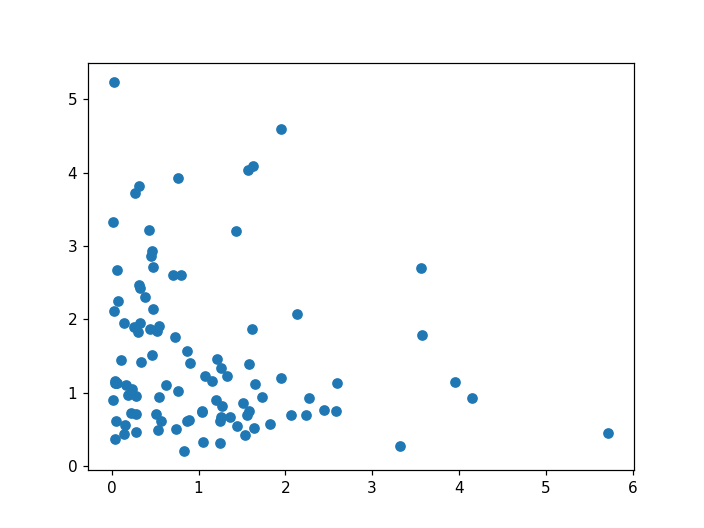

In [142]:
plt.figure()
plt.scatter(src3[0:100], src2[0:100])

<IPython.core.display.Javascript object>


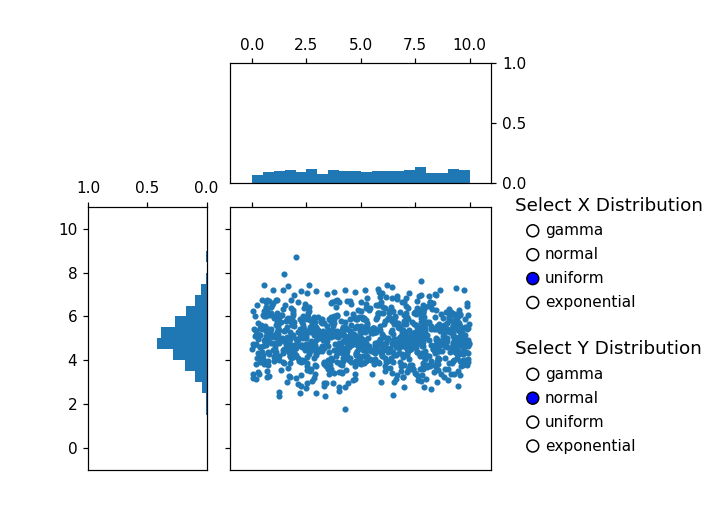

In [147]:
labeled_data = {
    'gamma': src2,
    'normal': src1,
    'uniform': src4,
    'exponential': src3
}


fig = plt.figure()
gs = gridspec.GridSpec(3,4)


left = plt.subplot(gs[1:3, 0])
left.xaxis.tick_top()
left.invert_xaxis()
# left.autoscale(enable=False, axis='both')

top = plt.subplot(gs[0, 1:3])
top.xaxis.tick_top()
top.yaxis.tick_right()
# top.autoscale(enable=False, axis='both')

mid = plt.subplot(gs[1:3, 1:3])
mid.xaxis.tick_top()
mid.tick_params(labelleft=False, labeltop=False)
# Does nothing
# mid.autoscale(enable=False, axis='both')

def add_radios(row):
    right = plt.subplot(gs[row, 3])
    right.set_frame_on(False)
    right.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
    right.set_title('Select {} Distribution'.format('Y' if row == 2 else 'X'),
                    loc='left', y=0.89)
#     help(right.get_title())
    rb = widgets.RadioButtons(right, labeled_data.keys(), active=0)
    return right, rb

r1, rb1 = add_radios(1)
r2, rb2 = add_radios(2)
selected = ['gamma', 'gamma']


def reset_axes():
    mid.axis([-1,11,-1,11])
    left.axis([1,0,-1,11])
    top.axis([-1,11,0,1])

def rbclick(label, which):
    
    howmany = 1000
    mid.cla(), left.cla(), top.cla()
    selected[which] = label
#     plt.text(3,4,'{} clicked with label: {}'.format(which, label))
    x = labeled_data[selected[0]][0:howmany]
    y = labeled_data[selected[1]][howmany:howmany*2]
    mid.scatter(x, y, marker='.')
    top.hist(x, density=True, bins=np.arange(0,10.5,0.5))
    left.hist(y, density=True, bins=np.arange(0,10.5,0.5), orientation='horizontal')
    reset_axes()
    
    
cid1 = rb1.on_clicked(lambda l: rbclick(l, 0))
cid2 = rb2.on_clicked(lambda l: rbclick(l, 1))

rbclick('gamma', 0)
rbclick('gamma', 1)
